In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
df=pd.read_csv("C:/Users/aksha/OneDrive/Desktop/New folder/Data Science Project Program/DataSets/Project 3_Basic ML _ Kyphosis/kyphosis.csv")
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [41]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [42]:
value_count=df['Kyphosis'].value_counts()
value_count

absent     64
present    17
Name: Kyphosis, dtype: int64

#### Error: sns.barplot(x =value_count.index,y =value_count.values, hue='Kyphosis', data=df)

<AxesSubplot:>

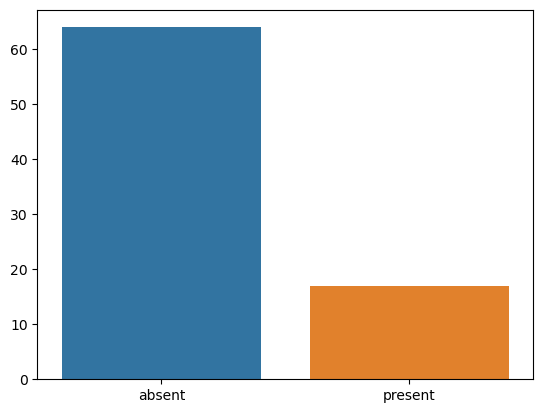

In [43]:
sns.barplot(x =value_count.index,y =value_count.values, data=df)

In [44]:
# df data will be converted into numpy arrays
x=df.drop('Kyphosis', axis=1)
y= df['Kyphosis']

x_np= x.to_numpy()
y_np= y.to_numpy()

In [45]:
# We can see a big difference in data after converting it to numpy arrays
import sys
print(sys.getsizeof(x))
print(sys.getsizeof(x_np))
print(sys.getsizeof(y))
print(sys.getsizeof(y_np))

2088
128
5264
112


In [46]:
y=y.apply(lambda x: 1 if x == 'present' else 0)

In [47]:
y_np= np.where(y_np == 'present',1,0)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)
x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(x_np,y_np,test_size=0.3,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train_np.shape, x_test_np.shape, y_train_np.shape, y_test_np.shape)
print(type(x_train),type(x_train_np))

(56, 3) (25, 3) (56,) (25,)
(56, 3) (25, 3) (56,) (25,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


## Example array with a singleton
#### singleton_array = y_np

## Check if the array is a singleton
#### if np.ndim(singleton_array) == 0:
   #### print("This is a singleton array.")
#### else:
   #### # Your code for non-singleton arrays goes here
   #### pass

# Note:
## ML task: Binary classification:
### Types of classification task:
    - Multi-class classification
    - Binary classification(1 vs all)
    - Mult-label classification
#### Some ML algo's that can be used for binary classification -> Logistic reg, Naive Bayes, SVM, Decision Tree, Random Forest, Nueral Networks etc

In [49]:
from sklearn.linear_model import LogisticRegression
from timeit import default_timer as timer

start= timer()
lr= LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)
lr.predict(x_test)
print(timer()-start)

0.006162200000062512


### Question- What is multi_class ?

In [50]:
start= timer()
lr= LogisticRegression()
lr.fit(x_train_np,y_train_np)
ans = lr.predict(x_test_np)
ans_p = lr.predict_proba(x_test_np)
print(timer()-start)

0.005593799999815019


In [51]:
for i,j in enumerate(ans == y_test_np):
    if not j:
        print(ans[i])

1
0
0
0
1


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ans,y_test_np)

0.8

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler=MinMaxScaler()
standard_scaler=StandardScaler()

min_max_scaler.fit(x_train_np)
x_train_np_mm=min_max_scaler.transform(x_train_np)
x_test_np_mm=min_max_scaler.transform(x_test_np)


In [54]:
start= timer()
lr.fit(x_train_np_mm,y_train_np)
accuracy_score(lr.predict(x_test_np_mm),y_test_np)
print(timer()-start)

0.002979200000027049


In [55]:
standard_scaler.fit(x_train_np)
x_train_np_std=standard_scaler.transform(x_train_np)
x_test_np_std=standard_scaler.transform(x_test_np)

start= timer()
lr.fit(x_train_np_std,y_train_np)
accuracy_score(lr.predict(x_test_np_std),y_test_np)
print(timer()-start)

0.002224300000079893


In [56]:
import matplotlib.pyplot as plt
arr=np.random.randn(100,1)
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [57]:
mms_arr = mm_scaler.fit_transform(arr)
std_arr= std_scaler.fit_transform(arr)

Text(0.5, 1.0, 'Line Plots of Original and Scaled Arrays')

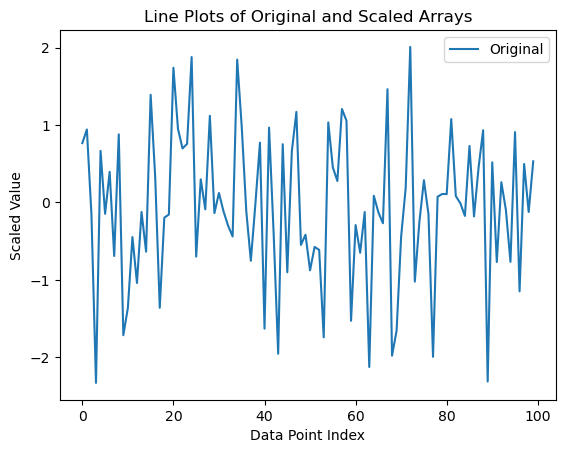

In [58]:
# Create a line plot for the original array
sns.lineplot(x=np.arange(len(arr)), y=arr.flatten(), label='Original')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Value')
plt.title('Line Plots of Original and Scaled Arrays')

Text(0.5, 1.0, 'Line Plots of Original and Scaled Arrays')

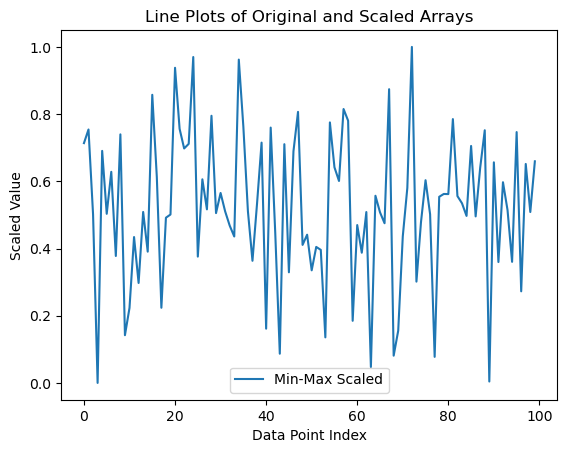

In [59]:
# Create a line plot for the Min-Max scaled array
sns.lineplot(x=np.arange(len(mms_arr)), y=mms_arr.flatten(), label='Min-Max Scaled')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Value')
plt.title('Line Plots of Original and Scaled Arrays')

Text(0.5, 1.0, 'Line Plots of Original and Scaled Arrays')

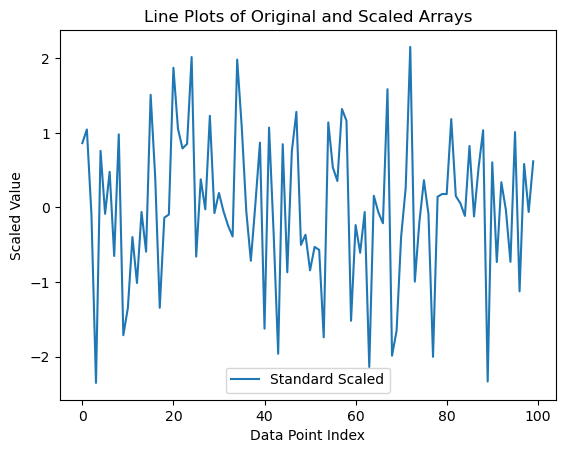

In [60]:
# Create a line plot for the Standard scaled array
sns.lineplot(x=np.arange(len(std_arr)), y=std_arr.flatten(), label='Standard Scaled')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Value')
plt.title('Line Plots of Original and Scaled Arrays')

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_np_mm, y_train)
accuracy_score(gnb.predict(x_test_np_mm), y_test_np)

0.8

In [62]:
print(lr.coef_)

[[ 0.38915562  0.59898909 -0.99353151]]


In [63]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma=0.2, C=1.0)
svm.fit(x_train_np_mm, y_train)
accuracy_score(svm.predict(x_test_np_mm), y_test_np)

0.8

0.6


[Text(0.5555555555555556, 0.9, 'X[2] <= 0.912\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.3333333333333333, 0.7, 'X[0] <= 0.704\ngini = 0.306\nsamples = 53\nvalue = [43, 10]'),
 Text(0.2222222222222222, 0.5, 'X[2] <= 0.265\ngini = 0.375\nsamples = 40\nvalue = [30, 10]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 0.634\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.7777777777777778, 0.7, 'X[2] <= 0.971\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

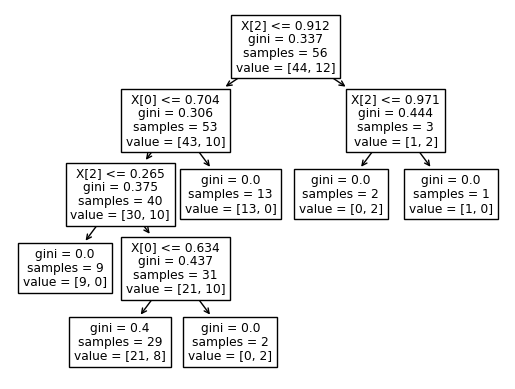

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc= DecisionTreeClassifier(max_depth=4, criterion='gini')
dtc.fit(x_train_np_mm, y_train)
print(accuracy_score(dtc.predict(x_test_np_mm),y_test_np))
tree.plot_tree(dtc)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_np_mm)
x_test_scaled = scaler.transform(x_test_np_mm)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train_np)

# Make predictions on the test set
y_pred = logreg.predict(x_test_scaled)

In [66]:
# Print the accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test_np, y_pred))

Logistic Regression Accuracy: 0.8


In [67]:
from sklearn.svm import SVC
# Standardize the features (important for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_np_mm)
x_test_scaled = scaler.transform(x_test_np_mm)

# Create and train the SVM model
svm = SVC(kernel='linear', C=1.0)  # You can choose other kernels and adjust hyperparameters
svm.fit(x_train_scaled, y_train_np)

# Make predictions on the test set
y_pred = svm.predict(x_test_scaled)

In [68]:
# Print the accuracy
print("SVM Accuracy:", accuracy_score(y_test_np, y_pred))

SVM Accuracy: 0.8


In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(max_samples=0.75,random_state=42)
rfc.fit(x_train_np_mm, y_train_np)
print(accuracy_score(rfc.predict(x_test_np_mm),y_test_np))

0.76


In [76]:
# HyperParametric tuning using gridsearchcv()

from sklearn.model_selection import GridSearchCV
forest_params=[{'max_depth':[2,8,None],'max_features':[0.2,0.6,1.0],'n_estimators':[10,50,100,150,200],'max_samples':[0.5,0.75,1.0]}]
model_cv=GridSearchCV(rfc, forest_params, cv=5,verbose=2,n_jobs=-1)

model_cv.fit(x_train_np_mm, y_train_np)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.75,
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [2, 8, None],
                          'max_features': [0.2, 0.6, 1.0],
                          'max_samples': [0.5, 0.75, 1.0],
                          'n_estimators': [10, 50, 100, 150, 200]}],
             verbose=2)

In [77]:
print(accuracy_score(model_cv.predict(x_test_np_mm),y_test_np))

0.84


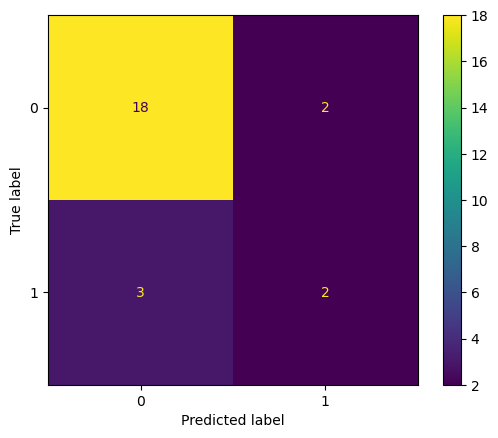

In [72]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm= confusion_matrix(y_test_np, ans)
disp= ConfusionMatrixDisplay(cm)
disp.plot()